# 1. INTRODUCTION:
This problem was originally proposed by Prof. I-Cheng Yeh, Department of Information Management Chung-Hua University, Hsin Chu, Taiwan in 2007. It is related to his research in 1998 about how to predict compression strength in a concrete structure.

The conventional process of testing the compressive strength of concrete involves casting several cubes for the respective grade and observing the strength of the concrete over a period of time ranging from 7 to 28 days.

Various combinations of the components of concrete are selected and cubes for each combination is casted and its test strength at 7, 14 and 28 days is noted dow. This is a time consuming and rather tedious process.

This project aims to predict the compressive strength of concrete with maximum accuracy and lowest error (evaluation metrics MAE) , for various quantities of constituent components as the input. The conrete cube exhibits behavioral differences in their compressive strengths for cubes that are cured/not cured. Curing is the process of maintaining the moisture to ensure uninterrupted hydration of concrete.

The concrete strength increases if the concrete cubes are cured periodically. The rate of increase in strength is described here.

Time % Of Total Strength Achieved [1] [2]

* 1 day 16%
* 3 days 40%
* 7 days 65%
* 14 days 90%
* 28 days 99%

At 28 days, concrete achieves 99% of the strength. Thus usual measurements of strength are taken at 28 days[1] 

The goals of this case are:

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients of regression model using the formula that provided us:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$


# EXPLORATORY DATA ANALYSIS

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#plot
import seaborn as sns
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import HuberRegressor

#preprocessing/hyperparameter tunning
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#optional
pd.set_option("display.max_row",1030)
pd.set_option("display.max_column",1030)
import warnings
warnings.filterwarnings("ignore")

In [3]:
#dataset reading
data = pd.read_csv("concrete_data.csv")
data.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#copy of the dataset
df=data.copy()
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### summary
- 1030 entries 
- 9 columns
- 2 types of variables: float and int
- no missing data

In [5]:
#?duplicated
df.duplicated().sum()

25

In [6]:
#drop duplicates
df =df.drop_duplicates()

In [7]:
#summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.629055,104.345003,102.000000,190.680000,265.000000,349.00000,540.000000
slag,1005.0,72.043134,86.170555,0.000000,0.000000,20.000000,142.50000,359.400000
fly_ash,1005.0,55.535075,64.207448,0.000000,0.000000,0.000000,118.27000,200.100000
water,1005.0,182.074378,21.340740,121.750000,166.610000,185.700000,192.94000,247.000000
superplasticizer,1005.0,6.031647,5.919559,0.000000,0.000000,6.100000,10.00000,32.200000
coarse_aggregate,1005.0,974.376468,77.579534,801.000000,932.000000,968.000000,1031.00000,1145.000000
fine_aggregate,1005.0,772.686617,80.339851,594.000000,724.300000,780.000000,822.20000,992.600000
age,1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.00000,365.000000
strength,1005.0,35.250273,16.284808,2.331808,23.523542,33.798114,44.86834,82.599225


The dataset has some outliers and the most obvious comes from the age column

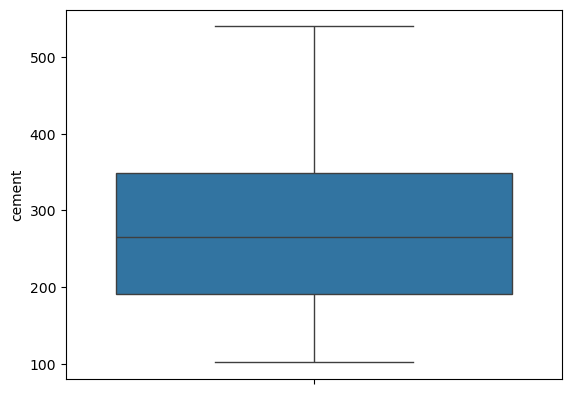

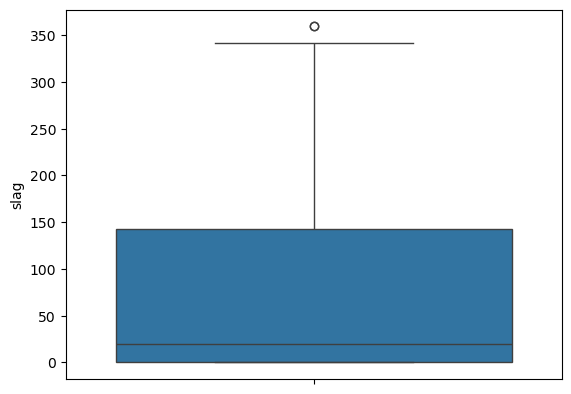

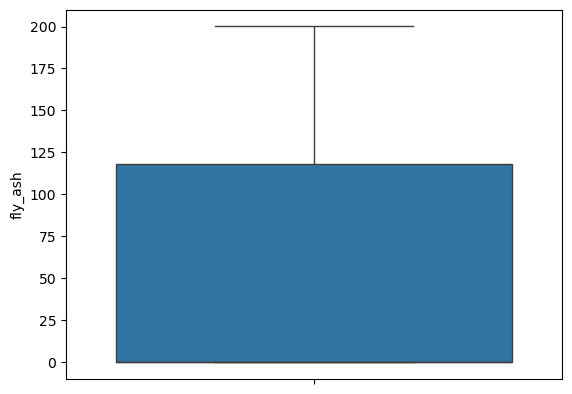

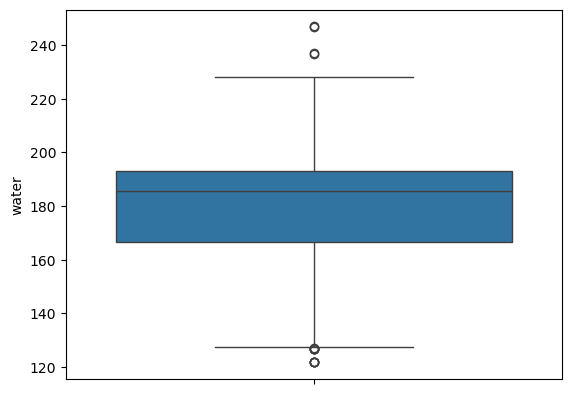

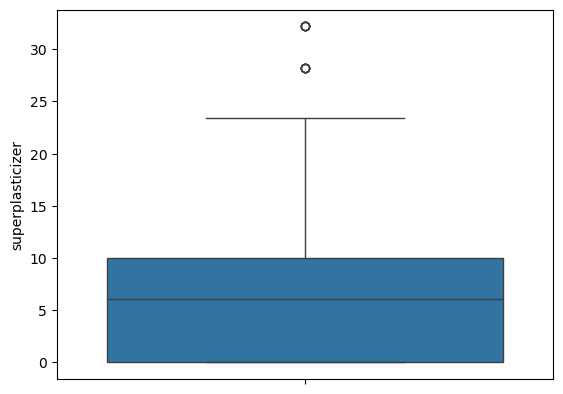

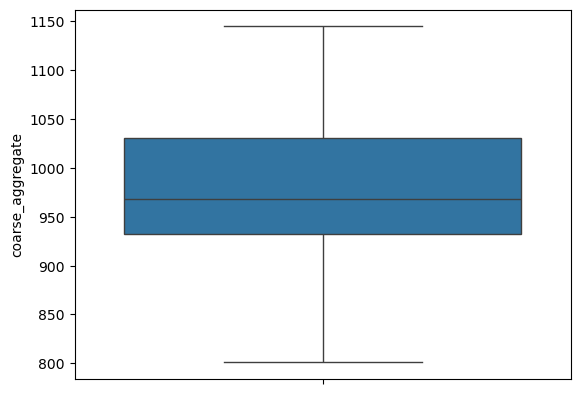

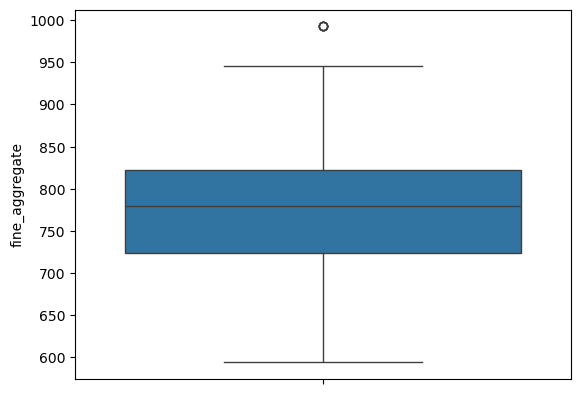

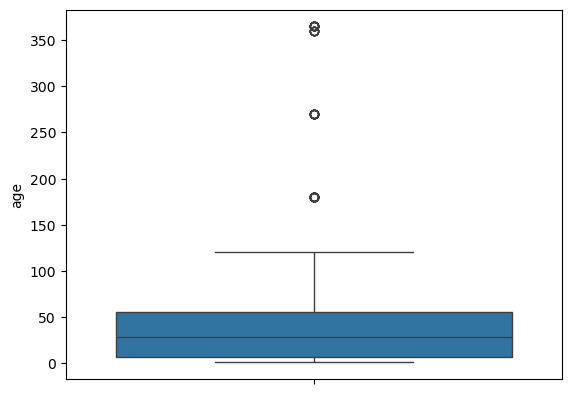

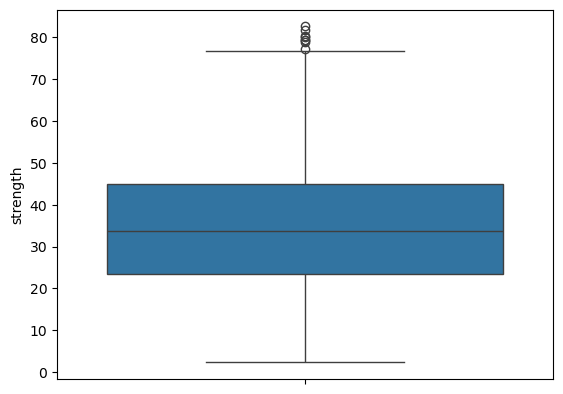

In [8]:
#let's confirm the information the describe method gave us 
for col in df.select_dtypes(include=["float","int"]):
    plt.figure()
    sns.boxplot(y=df[col])

In [9]:
#capping outliers 
def finding_outliers(dataframe, variable_name):
    iqr = data[variable_name].quantile(0.75) -  data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5 * iqr
    upper = data[variable_name].quantile(0.75) + 1.5 * iqr
    
    return data[(data[variable_name] < lower)| (data[variable_name] > upper )]
#setting outliers in the age column to the maximum
df.loc[finding_outliers(df,"age").index, 'age'] = df.age.quantile(0.75) + 1.5 * (df.age.quantile(0.75) - df.age.quantile(0.25))

#setting outliers in the strength column to the maximum
df.loc[finding_outliers(df,"strength").index, 'strength'] = df.strength.quantile(0.75) + 1.5 * (df.strength.quantile(0.75) - df.strength.quantile(0.25))

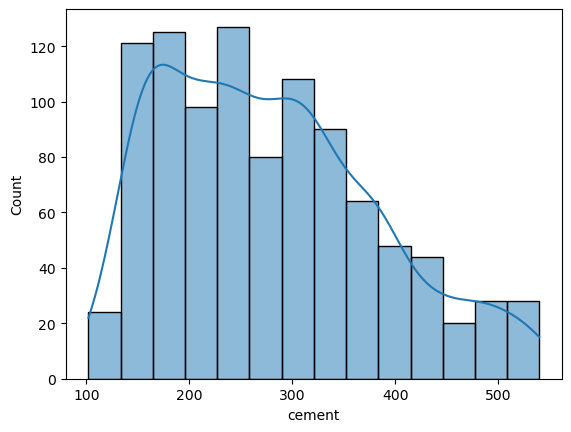

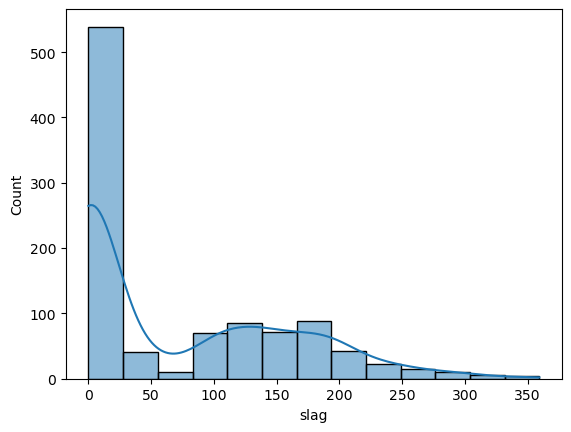

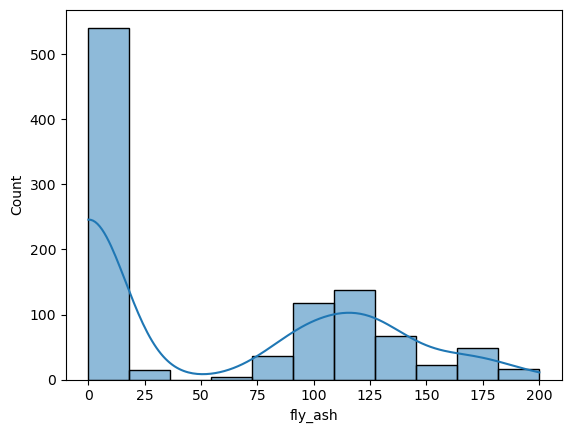

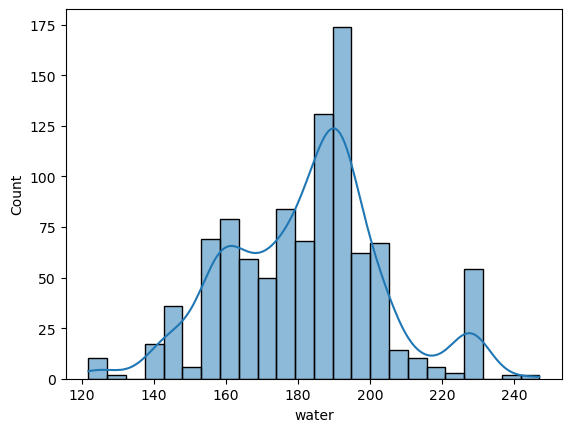

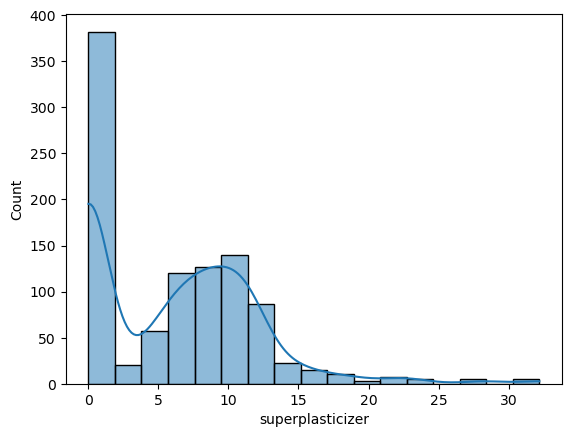

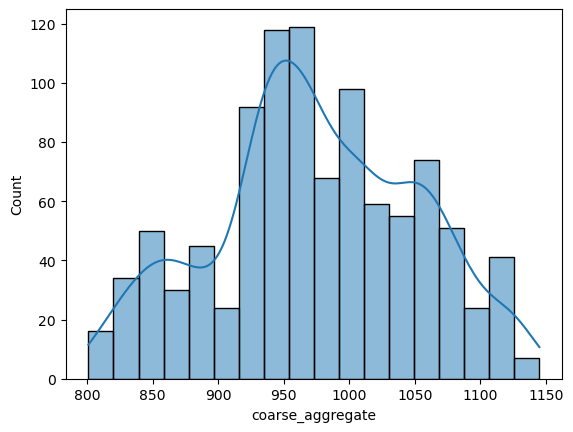

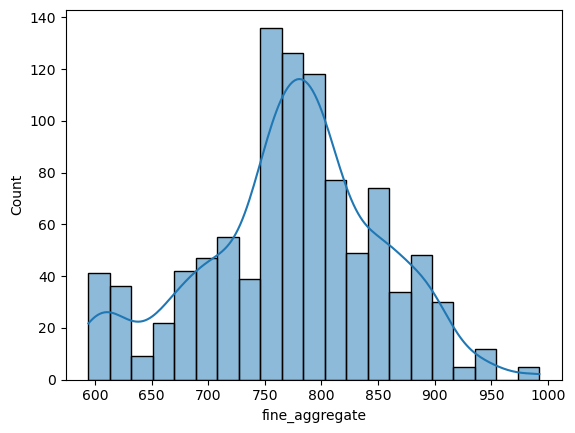

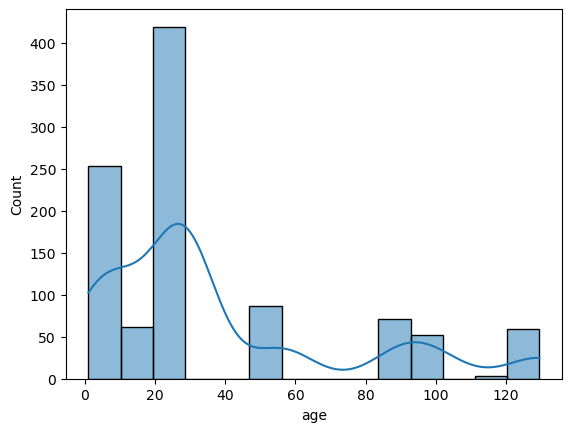

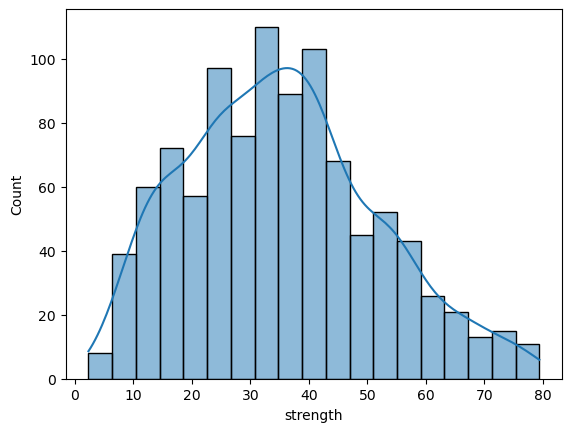

In [10]:
#distributions
for col in df.select_dtypes(include=["float64", 'int']):
    plt.figure()
    sns.histplot(df[col], kde=True)

The values are not normally distributed

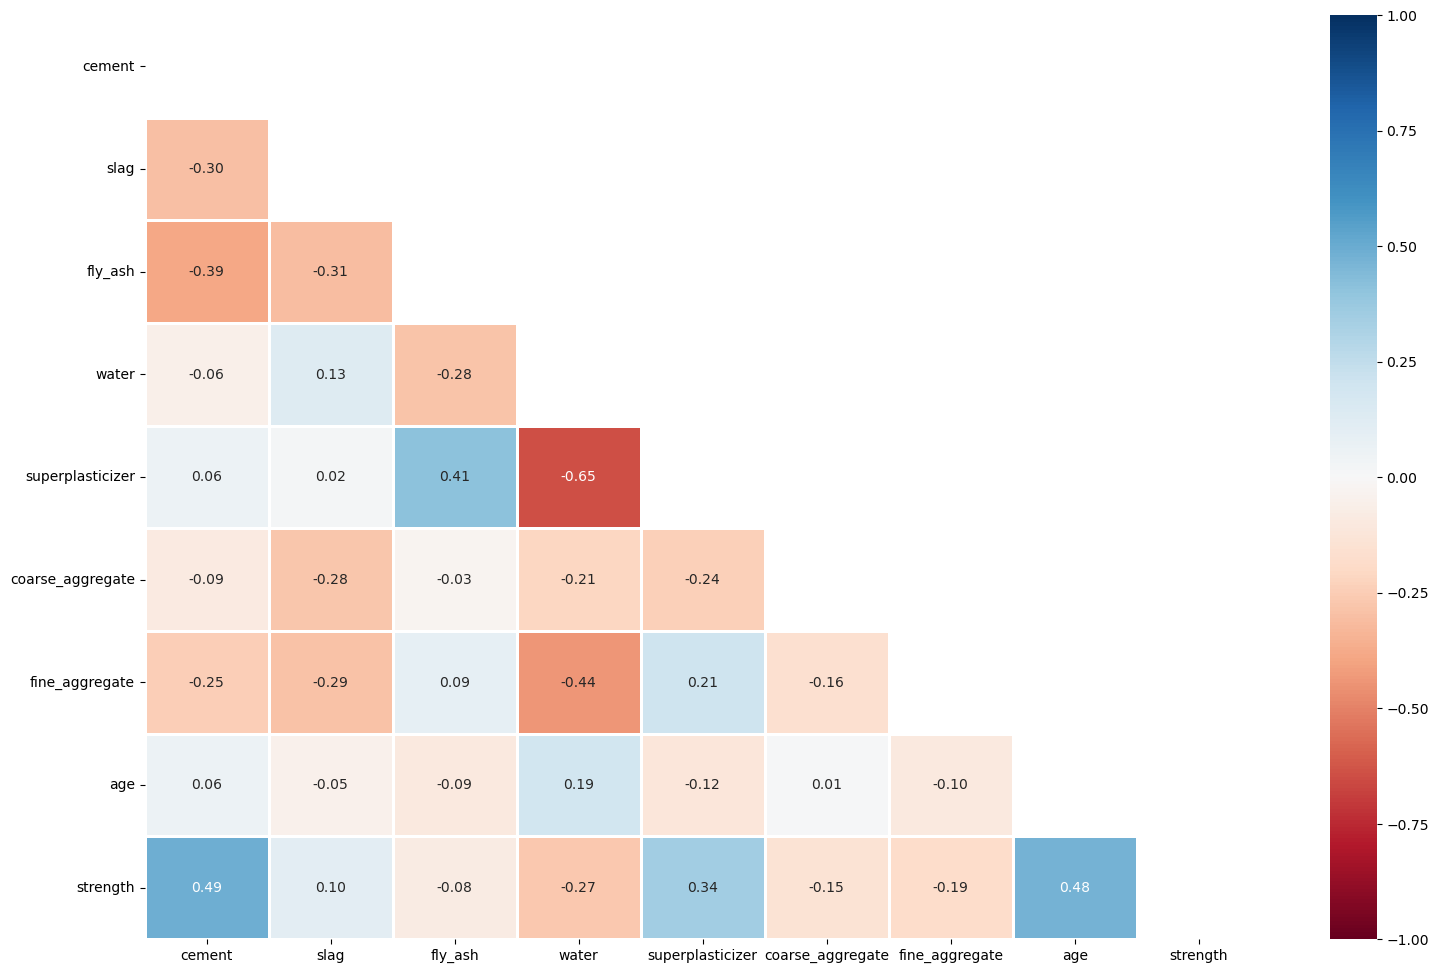

In [11]:
#bivariate analysis
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, center=0, cmap ="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

According to the correlation matrix:
- strenght has a moderate correlation with cement , superplasticizer and age
- superplasticizer and water have a strong negative correlation
- superplasticizer has a moderate correlation with fly_ash

In [12]:
#Question 1 :The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
age1= df[df["age"] == 1]
age7= df[df["age"] == 7]
age14= df[df["age"] == 14]
age28= df[df["age"] == 28]

mean1 = age1["strength"].mean()
mean7  = age7["strength"].mean()
mean14  = age14["strength"].mean()
mean28  = age28["strength"].mean()

dictionnary={
"Day 1 ": mean1,
"Day 7 ": mean7,
"Day 14 ": mean14,
"Day 28 ":mean28
}

for key, value in dictionnary.items():
    print(key+': ', value)

Day 1 :  9.452715959999999
Day 7 :  25.181843362178792
Day 14 :  28.751037994193553
Day 28 :  36.41040808733174


The result above confirms the positive relationship between age and strength because as we can see, when age increase, strength increases as well

<Axes: xlabel='cement', ylabel='strength'>

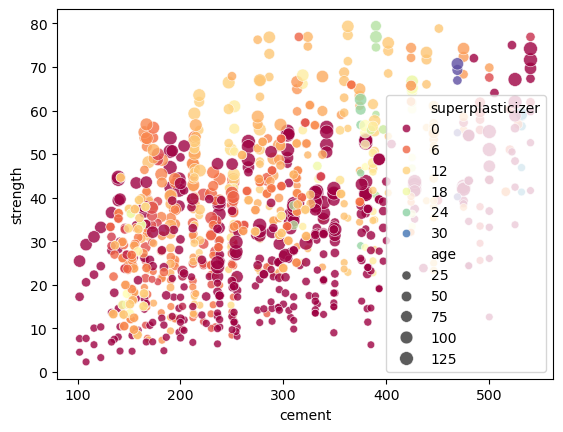

In [13]:
#let's visualize the relationship between the target and the other variables 
sns.scatterplot(data =df,x="cement", y="strength", hue="superplasticizer", size="age",
                sizes = (30, 100),palette='Spectral', alpha=0.8)

from this plot we can conclude that we have weak strength when the superplasticizer is at 0 which logically means more water. once the value of the superplasticizer and the cement is increased we notice an increase of strength 

# PREPROCESSING

In [14]:
#feature engineering
df = df.copy()
# df["aggregate"] = df["coarse_aggregate"] + df["fine_aggregate"]
# df.drop(["coarse_aggregate","fine_aggregate"], axis=1, inplace=True)

In [15]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,76.885537
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.296075


In [16]:
#separate target and the features
X= df.drop("strength", axis=1)
y=df[["strength"]].values

#split into training and test set
seed=142
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

In [17]:
#scaling
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# MODELLING

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
eln = ElasticNet()
hub = HuberRegressor()
bay = BayesianRidge()
svm = SVR(kernel="linear")
rdf = RandomForestRegressor()

In [20]:
dictio = {
    "LinearRegression":linreg,
    "Ridge": ridge,
    "Lasso":lasso,
    "ElasticNet":eln,
    "HuberRegressor":hub,
    " BayesianRidge":bay,
    "SVR":svm,
    "RandomForestRegressor":rdf
}

In [21]:
#evaluation 
def evaluation(model):
    model.fit(xtrain_scaled, ytrain)
    ypred = model.predict(xtest_scaled)
    print("MSE :", mean_squared_error(ytest, ypred))
    print("MAE :", mean_absolute_error(ytest, ypred))
    print("RMSE :", np.sqrt(mean_squared_error(ytest, ypred)))
    print("R² :", r2_score(ytest, ypred))
    # print(model.coef_,"\n")
    
    # N, train_score, val_score = learning_curve(model, xtrain_scaled, ytrain, cv =5,scoring="neg_mean_squared_error",  train_sizes=np.linspace(0.1, 1.0, 10))
    # plt.figure(figsize=(12,8))
    # plt.plot(N, train_score.mean(axis=1), label ="Training score")
    # plt.plot(N, val_score.mean(axis=1), label = "Validation score")
    # plt.legend()

In [22]:
for name, model in dictio.items():
    print(name)
    evaluation(model)

LinearRegression
MSE : 64.89095379297315
MAE : 6.17137120201903
RMSE : 8.055492150885206
R² : 0.7602728085868509
Ridge
MSE : 67.22165699288814
MAE : 6.314584059305764
RMSE : 8.198881447666391
R² : 0.7516624723308014
Lasso
MSE : 175.09815706873874
MAE : 10.740262509463763
RMSE : 13.232466023713748
R² : 0.3531334190336307
ElasticNet
MSE : 248.48092819966502
MAE : 12.878442859404773
RMSE : 15.763277838053385
R² : 0.08203483605617035
HuberRegressor
MSE : 64.92270141420641
MAE : 6.129884507903895
RMSE : 8.057462467440132
R² : 0.760155523085137
 BayesianRidge
MSE : 65.20654009538265
MAE : 6.1889386636045325
RMSE : 8.075056662053997
R² : 0.7591069354796924
SVR
MSE : 84.384197803853
MAE : 7.056210246670947
RMSE : 9.186087186819696
R² : 0.6882587547763881
RandomForestRegressor
MSE : 28.07282173325938
MAE : 3.684649221779423
RMSE : 5.29837916095662
R² : 0.8962903407056249


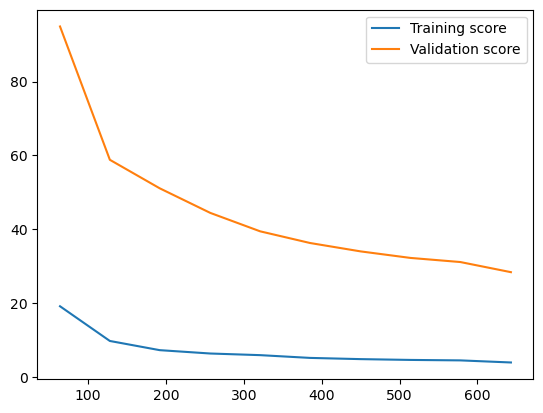

In [23]:
N, train_score, val_score = learning_curve(rdf, xtrain_scaled, ytrain, cv =5,scoring="neg_mean_squared_error",  train_sizes=np.linspace(0.1, 1.0, 10))
plt.plot(N, -train_score.mean(axis=1), label ="Training score")
plt.plot(N, -val_score.mean(axis=1), label = "Validation score")
plt.legend()

In [24]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Random Search
random_search = RandomizedSearchCV(estimator=rdf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(xtrain_scaled, ytrain)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 484}


In [25]:
Best_model = RandomForestRegressor(max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=484)
Best_model.fit(xtrain_scaled, ytrain)
pred = Best_model.predict(xtest_scaled)
print("MSE :", mean_squared_error(ytest, pred))
print("MAE :", mean_absolute_error(ytest,pred))
print("RMSE :", np.sqrt(mean_squared_error(ytest, pred)))
print("R² :", r2_score(ytest, pred))

MSE : 27.868417745537737
MAE : 3.8281758416900566
RMSE : 5.279054626117989
R² : 0.8970454720610136


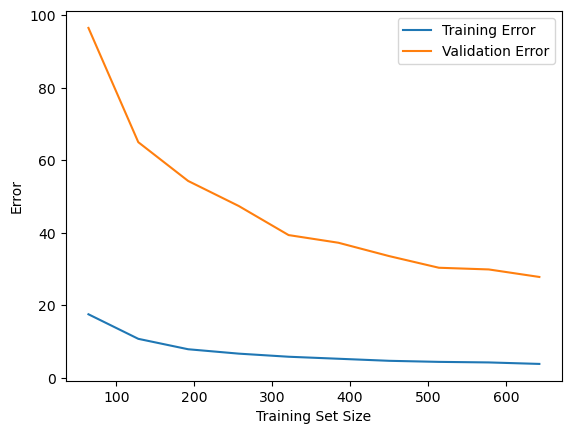

In [26]:
N, train_score, val_score = learning_curve(Best_model, xtrain_scaled, ytrain, cv =5,scoring="neg_mean_squared_error",  train_sizes=np.linspace(0.1, 1.0, 10))
plt.plot(N, -train_score.mean(axis=1), label ="Training Error")
plt.plot(N, -val_score.mean(axis=1), label = "Validation Error")
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.legend()
plt.show() 

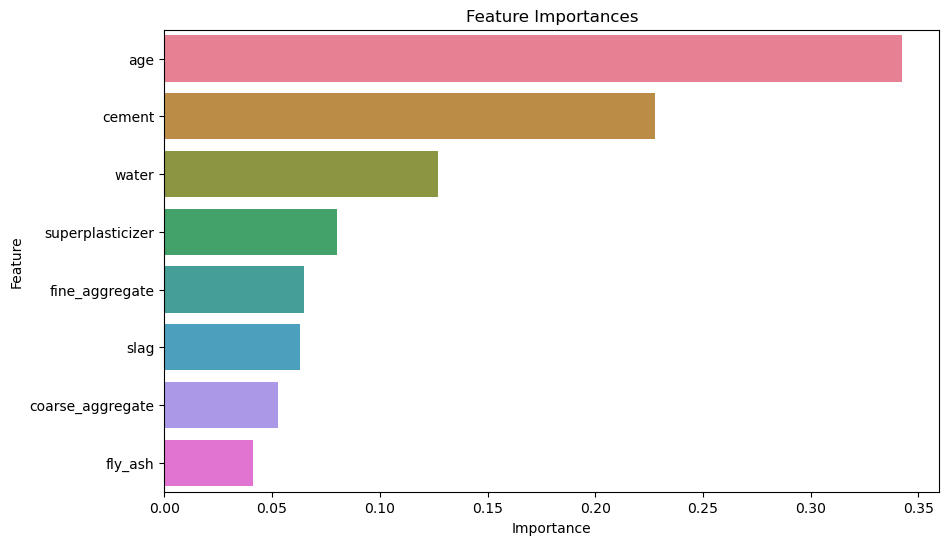

In [27]:
feature_importances = Best_model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette="husl")
plt.title('Feature Importances')
plt.show()